<a href="https://colab.research.google.com/github/Suresh8352/CreditCardFraudDetection/blob/main/ccfd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
```
#        **CREDIT CARD FRAUD DETECTION USING LOGISTIC REGRESSION**
```
```



```
FIRST STEP of the project is to import the required libraries.
1.numpy for dealing with arrays
2.pandas for delaing with the dataset as dataframes.
3.train_test_split from sklearn.model_selection for splitting the data into training and testing data.
4.LogisticRegression model from sklearn.linear_model
5.accuracy_score from sklearn.metrics.
```



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
## loading the dataset into pandas dataframe
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1981,1524,-0.340622,1.132232,1.291494,0.062313,0.016387,-0.977070,0.723755,-0.074630,-0.396655,...,-0.262948,-0.688785,-0.010937,0.334061,-0.160025,0.071779,0.245128,0.098336,5.35,0.0
1982,1525,-1.842696,1.740641,0.861526,-0.856315,-0.655376,-0.842786,0.198563,0.602764,0.455595,...,-0.213609,-0.400617,0.030013,0.512611,-0.077087,0.286218,0.586012,0.352610,1.00,0.0
1983,1525,-0.480693,0.646091,1.577264,-0.084411,-0.305958,-0.534739,0.860346,-0.028569,-0.800705,...,0.121681,0.175190,0.035986,0.557665,-0.112301,0.337154,-0.015602,0.051504,80.70,0.0
1984,1525,-0.342132,1.091125,1.282729,0.068076,-0.022498,-0.996727,0.676304,-0.042250,-0.312036,...,-0.269850,-0.734148,-0.007354,0.319161,-0.179146,0.073683,0.241932,0.097139,3.59,0.0
1985,1526,-0.854343,1.382948,1.278665,2.914727,-0.183139,-0.349329,0.274566,0.435277,-1.576521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




```
```
#SUMMARY OF THE DATA
```
1.Time which is given in the first column is the time elapsed of the transaction from the first transaction, which is done at time 0.
For example, if time is 60, then that particular transaction happend one minute after the first transaction.
2. After seeing all the columns, except transaction and the amount we dont know the details of other columns (V1,V2...V28).
As the credit card details are very sensitive they cant be shared. Those columns represent the features of a particular transaction which undergone a Principal component analysis.
3.The column Class shows whether the transaction is legit or a fraudlent transaction.
If the label is 0 it is legal transaction.
If the label is 1 it is fraudlent transaction.
```




In [5]:
#column names of the dataframe
credit_card_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
#credit card data information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1986 non-null   int64  
 1   V1      1986 non-null   float64
 2   V2      1986 non-null   float64
 3   V3      1986 non-null   float64
 4   V4      1986 non-null   float64
 5   V5      1986 non-null   float64
 6   V6      1986 non-null   float64
 7   V7      1986 non-null   float64
 8   V8      1986 non-null   float64
 9   V9      1986 non-null   float64
 10  V10     1986 non-null   float64
 11  V11     1986 non-null   float64
 12  V12     1986 non-null   float64
 13  V13     1986 non-null   float64
 14  V14     1985 non-null   float64
 15  V15     1985 non-null   float64
 16  V16     1985 non-null   float64
 17  V17     1985 non-null   float64
 18  V18     1985 non-null   float64
 19  V19     1985 non-null   float64
 20  V20     1985 non-null   float64
 21  V21     1985 non-null   float64
 22  

In [7]:
#statistical measure of data i.e.,different parameters of each column like min,max,mean,standard deviation,count,etc..
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,...,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,761.035750,-0.284195,0.266886,0.848005,0.151216,-0.077457,0.050205,0.138347,-0.058795,0.012145,...,-0.011611,-0.144319,-0.043045,0.013864,0.108372,0.049408,0.027197,-0.002018,68.602469,0.001008
std,451.034025,1.353508,1.142026,1.012645,1.264932,1.272512,1.274204,1.140750,0.966493,0.900828,...,0.653200,0.588201,0.352890,0.601370,0.407874,0.454251,0.369485,0.272864,241.677019,0.031734
min,0.000000,-11.140706,-12.114213,-12.389545,-4.657545,-32.092129,-3.498447,-4.925568,-12.258158,-3.110515,...,-4.709977,-2.776923,-4.020300,-2.162523,-1.577384,-1.243924,-5.336289,-2.738566,0.000000,0.000000
25%,366.000000,-1.045512,-0.204111,0.280517,-0.670513,-0.576269,-0.691393,-0.286991,-0.172322,-0.479310,...,-0.226941,-0.547474,-0.181176,-0.350802,-0.151028,-0.281097,-0.049467,-0.021053,4.950000,0.000000
50%,750.000000,-0.437621,0.314294,0.864505,0.190698,-0.154843,-0.198063,0.117535,0.037598,-0.034097,...,-0.087329,-0.152603,-0.057041,0.093137,0.131713,0.036992,0.023011,0.022722,15.090000,0.000000
75%,1161.000000,1.095047,0.926126,1.486942,1.002546,0.376901,0.389714,0.569262,0.279513,0.449706,...,0.083530,0.252698,0.064859,0.428755,0.383339,0.303731,0.140481,0.090920,63.650000,0.000000
max,1526.000000,1.685314,6.118940,4.017561,6.013346,7.672544,21.393069,34.303177,3.877662,6.450992,...,6.765928,1.957759,4.095021,1.215279,1.629684,3.463246,3.852046,4.157934,7712.430000,1.000000


In [8]:
#checking the number of missing vaues in every column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

```
1. We found that all the colums are having not-null values. So there is no missing of data.
```

In [9]:
#getting the number of legit and fraud transactions count based on the Class columns
credit_card_data['Class'].value_counts()

0.0    1983
1.0       2
Name: Class, dtype: int64

```
Here we can see the data is very imbalance i.e., there are very low fraudlent transactions compared to legit transactions.
If we use this data to predict the fraudlent transactions we wont be able to do it because of very less number of fraudlent transaction.
In handling imbalance data data preprocessing plays an important role.
```

In [10]:
#separating the data into legit and fraud
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data.Class==1]
print(legit.shape)
print(fraud.shape)

(1983, 31)
(2, 31)


In [11]:
print('Legit transactions are', round(len(legit)/len(credit_card_data) * 100,3), '% of the dataset')
print('Fraud transactions are', round(len(fraud)/len(credit_card_data) * 100,3), '% of the dataset')

Legit transactions are 99.849 % of the dataset
Fraud transactions are 0.101 % of the dataset


In [12]:
#statistical measure of legit transactions amount
legit.Amount.describe()

count    1983.000000
mean       68.404892
std       241.572682
min         0.000000
25%         4.950000
50%        15.090000
75%        63.285000
max      7712.430000
Name: Amount, dtype: float64

In [13]:
#statistical measure of fraud transactions amount
fraud.Amount.describe()

count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64

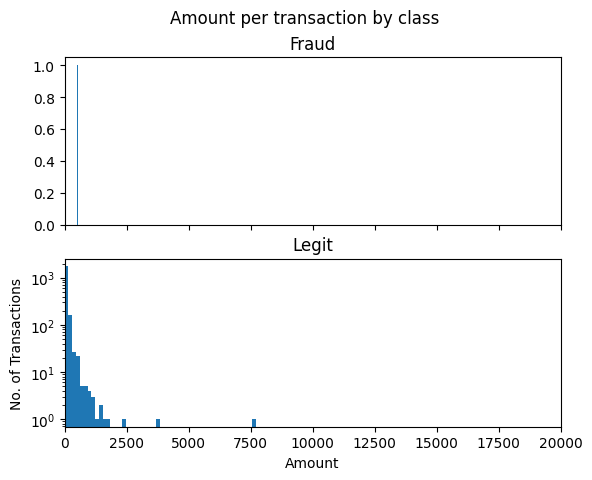

In [14]:
f,(ax1,ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')
bins=50
ax1.hist(fraud.Amount,bins = bins)
ax1.set_title('Fraud')
ax2.hist(legit.Amount,bins=bins)
ax2.set_title('Legit')
plt.xlabel('Amount')
plt.ylabel('No. of Transactions')
plt.xlim(0,20000)
plt.yscale('log')
plt.show();

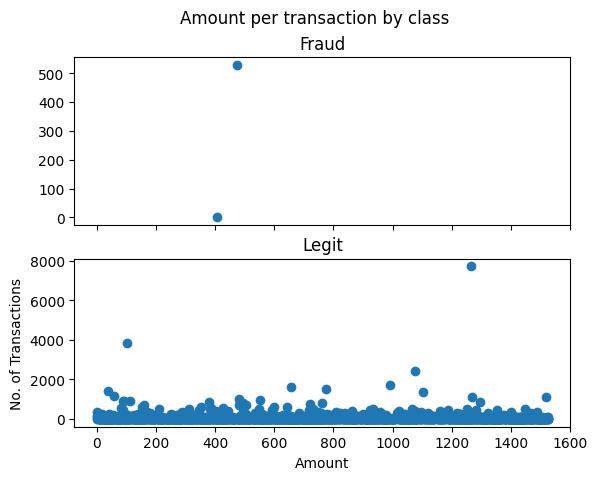

In [15]:
f,(ax1,ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')
ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time,legit.Amount)
ax2.set_title('Legit')
plt.xlabel('Amount')
plt.ylabel('No. of Transactions')
plt.show();

In [16]:
#comparing the data of legit and fraud transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,760.974786,-0.281494,0.267200,0.848906,0.146804,-0.077904,0.051713,0.139533,-0.059771,0.014492,...,0.056618,-0.012217,-0.144666,-0.043548,0.013865,0.108318,0.049441,0.027220,-0.001966,68.404892
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


```
As the data of the given dataframe is very imbalanced, we need to create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases.
This will help our algorithms better understand patterns that determines whether a transaction is a fraud or not.

```
# Sub-Sample
```
In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions.
Meaning our sub-sample will have the same amount of fraud and non fraud transactions.
There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
We concat the 492 cases of fraud and non fraud, creating a new sub-sample.
```

In [17]:
#taking random values of legit transactions of same number as fraud (492)
legit_sample = legit.sample(n=492)

In [18]:
new_data = pd.concat([legit_sample,fraud],axis=0)
#here axis = 0 will make sure that both dataframes are added row wise, i.e., one by one.

In [19]:
print(new_data.shape)

(494, 31)


In [20]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1313,1029,-2.582175,2.213807,1.749030,-2.389200,0.713566,-0.214627,1.962399,-1.415934,3.074449,...,-0.757745,0.042332,-0.220885,0.020242,-0.015996,0.556129,0.226622,-0.904042,0.92,0.0
251,171,-0.957820,0.247979,3.772857,3.311385,-1.305427,1.668379,-0.671931,0.453987,0.555107,...,0.107106,0.866859,-0.431986,0.581400,-0.015715,0.462414,-0.179224,-0.171544,71.69,0.0
764,574,-1.062129,-0.618574,0.615388,-3.335834,0.746649,-0.540531,0.705932,0.032525,1.334181,...,-0.114269,-0.661122,0.136250,-1.377245,0.263820,-1.115516,0.079213,0.116638,131.37,0.0
1651,1280,-0.325583,0.400558,1.562223,-0.326307,0.053673,-1.275265,0.908067,-0.356855,-0.091947,...,0.031923,0.098348,0.061269,0.712562,-0.373682,0.148596,-0.171763,-0.159885,38.99,0.0
1678,1302,1.004844,0.089362,-0.204425,1.208982,-0.025294,-0.808484,0.594482,-0.223907,-0.587363,...,0.122137,0.095003,-0.256179,0.337138,0.766657,-0.309132,-0.036344,0.020632,118.00,0.0


In [21]:
#getting the number of legit and fraud transactions in the new dataframe count based on the Class columns
new_data['Class'].value_counts()

0.0    492
1.0      2
Name: Class, dtype: int64

In [22]:
print('Legit transactions are', round(len(legit_sample)/len(new_data) * 100,3), '% of the new dataframe')
print('Fraud transactions are', round(len(fraud)/len(new_data) * 100,3), '% of the new dataframe')

Legit transactions are 99.595 % of the new dataframe
Fraud transactions are 0.405 % of the new dataframe


In [23]:
legit_sample.Amount.describe()

count    492.000000
mean      48.256951
std       79.579800
min        0.000000
25%        4.897500
50%       15.000000
75%       63.050000
max      589.210000
Name: Amount, dtype: float64

In [24]:
fraud.Amount.describe()

count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64

In [25]:
#comparing the new dataframe of legit and fraud transactions
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,761.636179,-0.257244,0.273136,0.902968,0.117380,-0.016304,-0.012895,0.097626,-0.007050,-0.012955,...,0.041617,-0.042909,-0.113919,-0.029920,0.022823,0.086238,0.055992,0.033041,0.001335,48.256951
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


In [26]:
#for comparing the random legit sample and original legit sample by comparing the mean values of both samples
comp = pd.concat([new_data.groupby('Class').mean(),credit_card_data.groupby('Class').mean()],axis=0)
comp.iloc[[0,2]]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,761.636179,-0.257244,0.273136,0.902968,0.117380,-0.016304,-0.012895,0.097626,-0.007050,-0.012955,...,0.041617,-0.042909,-0.113919,-0.029920,0.022823,0.086238,0.055992,0.033041,0.001335,48.256951
0.0,760.974786,-0.281494,0.267200,0.848906,0.146804,-0.077904,0.051713,0.139533,-0.059771,0.014492,...,0.056618,-0.012217,-0.144666,-0.043548,0.013865,0.108318,0.049441,0.027220,-0.001966,68.404892


```
here we can see, the random sample of legit transactions of 492 from 284315 showing the same statistical measurments as of the original legit transactions. So, the random sample can be used for the prediction of fraudlent transactions.
```



```
```
# Splitting the data into Features and Targets
```
```


In [27]:
X = new_data.drop(columns = 'Class',axis = 1)
Y = new_data['Class']

In [28]:
print(X)
print(Y)

      Time        V1        V2        V3        V4        V5        V6  \
1313  1029 -2.582175  2.213807  1.749030 -2.389200  0.713566 -0.214627   
251    171 -0.957820  0.247979  3.772857  3.311385 -1.305427  1.668379   
764    574 -1.062129 -0.618574  0.615388 -3.335834  0.746649 -0.540531   
1651  1280 -0.325583  0.400558  1.562223 -0.326307  0.053673 -1.275265   
1678  1302  1.004844  0.089362 -0.204425  1.208982 -0.025294 -0.808484   
...    ...       ...       ...       ...       ...       ...       ...   
534    403  1.237413  0.512365  0.687746  1.693872 -0.236323 -0.650232   
167    106 -0.306311  0.991272  1.414491  0.855244  0.334284 -0.728260   
23      18  0.247491  0.277666  1.185471 -0.092603 -1.314394 -0.150116   
541    406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   

            V7        V8        V9  ...       V20       V21       V22  \
1313  1.962399 -1.415934  3.074449  ..

```
here we can see the new data is splitted into features(input) and Target(output).
Features are Time, V1,V2.....V28, Amount.
Targets are Class (0 or 1)
1 ----> Fraud transaction
0 ----> Legit transaction
```


```
```
# Splitting the data into Training Data and Testing Data
```
```



In [29]:
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

```
 here we are using train_test_split() function for dividing the given data into training set and testing set.
 here test_size = 0.2 means 20% of the data is stored in testing sample and 80% of the data in the training sample.
 X_train will have the 80% of data and Y_train will have the values corresponding to X_train.
 X_test will have 20% of data and Y_test will have values corresponding to X_test.
 we mentioned stratify = Y, i.e., we divide the data by having Y as centre
 which means the divided data will have equal distribution of Y values.
```

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(494, 30) (395, 30) (99, 30)


In [31]:
scl = StandardScaler()
scl.fit(X_train)

X_train_scaler = scl.transform(X_train)
X_test_scaler = scl.transform(X_test)

In [32]:
X_train_scaler

array([[-0.83505707, -0.21525133,  0.3429162 , ..., -1.11486776,
        -1.62879814, -0.44229111],
       [-1.0862139 ,  0.36821459,  0.45350378, ...,  0.59797552,
         1.17710551, -0.38143793],
       [-0.93333583,  0.9946661 ,  0.16892297, ..., -0.1994345 ,
         0.10602245,  0.32098511],
       ...,
       [ 0.22416957,  1.18002207,  0.09054954, ..., -0.3820204 ,
        -0.06675337, -0.5127399 ],
       [-1.45312126,  1.13007369,  0.15330694, ...,  0.05372035,
         0.09637021, -0.58792576],
       [ 1.08247073,  0.98064112, -1.31389051, ...,  0.02445681,
         0.19972984,  1.31905015]])

In [33]:
X_train_scaler = pd.DataFrame(X_train_scaler, columns=X_train.columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=X_test.columns)


```
```
# Model Training
```
here we are using Logistic regression model. we can use different models but for binary classifications most frequently used model is logistic regression.
```


In [34]:
model = LogisticRegression()

In [35]:
model.fit(X_train_scaler,Y_train)

LogisticRegression()


```
```
# Model Evaluation
```
Accuracy score



In [36]:
#accuracy on training data
X_train_prediction = model.predict(X_train_scaler)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data: ',training_data_accuracy )


Accuracy on training data:  1.0


In [37]:
X_test_prediction = model.predict(X_test_scaler)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on testing data: ',testing_data_accuracy )

Accuracy on testing data:  1.0


In [38]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [39]:
print("Accuracy Score",accuracy_score(X_test_prediction,Y_test))
print("Precision score",precision_score(X_test_prediction,Y_test))
print("recall score",recall_score(X_test_prediction,Y_test))
print("F1 score",f1_score(X_test_prediction,Y_test))
print("Matthews score",matthews_corrcoef(X_test_prediction,Y_test))

Accuracy Score 1.0
Precision score 0.0
recall score 0.0
F1 score 0.0
Matthews score 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
